# Classify images(CiFAR-20) using CNN

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2024-01-14 17:25:54.646831: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-14 17:25:54.669006: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 17:25:54.669036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 17:25:54.669780: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 17:25:54.673761: I tensorflow/core/platform/cpu_feature_guar

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

## Visualize data

[9]


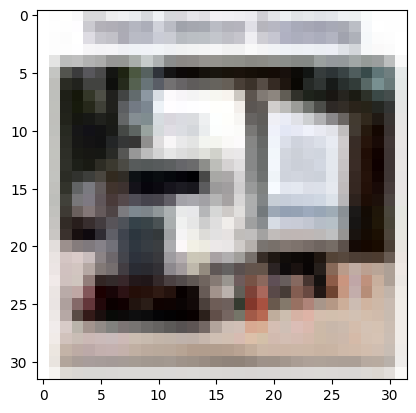

In [7]:
i = 666
plt.imshow(X_train[i])
print(y_train[i])

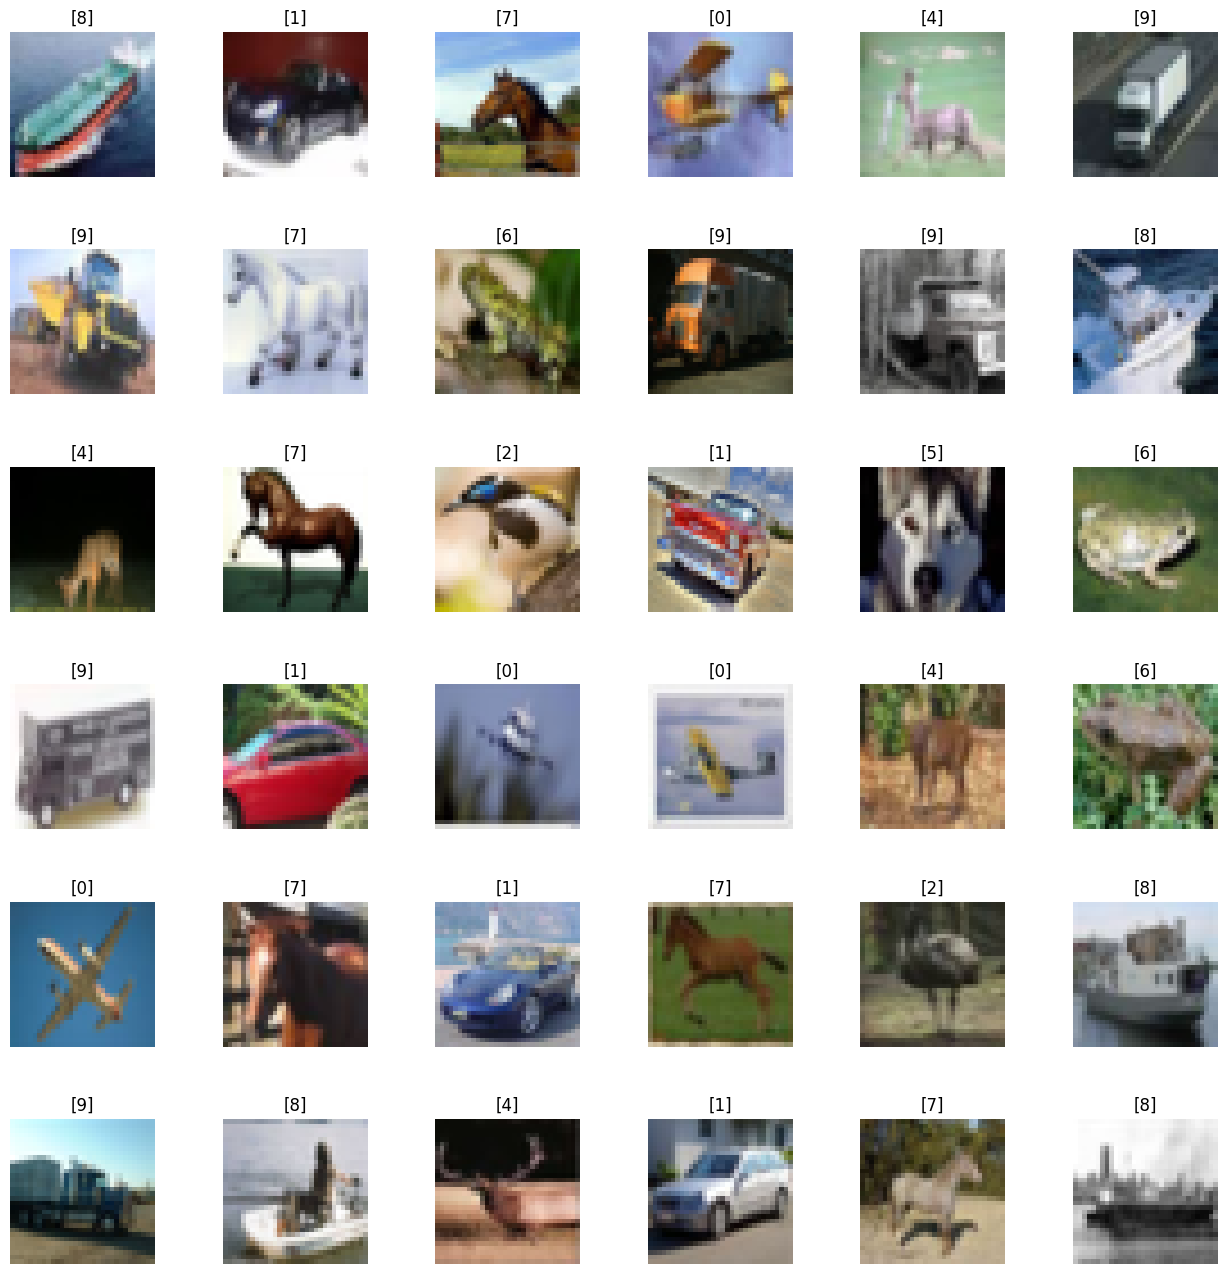

In [8]:
fig, axes = plt.subplots(6, 6, figsize = (16, 16))
axes = axes.ravel()

for i in np.arange(0, 6 * 6):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

plt.subplots_adjust(hspace=0.5)

## Data preparation

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
X_train /= 255
X_test /= 255

In [12]:
Input_shape = X_train.shape[1:]

## Train the model

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [14]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
model.add(AveragePooling2D(2, 2))
# model.add(Dropout(0.4))

# model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(filters = 1024, kernel_size = (3, 3), activation = 'relu'))
# model.add(AveragePooling2D(2, 2))
# # model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

2024-01-14 17:25:56.489122: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 17:25:56.509824: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 17:25:56.509931: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 average_pooling2d (Average  (None, 2, 2, 256)         0

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.01), metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10


2024-01-14 17:25:57.740793: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-01-14 17:25:57.814765: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-14 17:25:58.872197: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-14 17:25:58.982916: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe9f8e611a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-14 17:25:58.982934: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-01-14 17:25:58.986169: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705271159.010250   30363 device_compiler.

1563/1563 [==============================] - 40s 21ms/step - loss: 2.1380 - accuracy: 0.2347
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6434 - accuracy: 0.4164
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5882 - accuracy: 0.4419
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5633 - accuracy: 0.4570
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5809 - accuracy: 0.4496
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5750 - accuracy: 0.4501
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5785 - accuracy: 0.4563
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5733 - accuracy: 0.4579
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5818 - accuracy: 0.4589
Epoch 10/10
1563/1563 [==============================] - 32s 20ms/step - lo

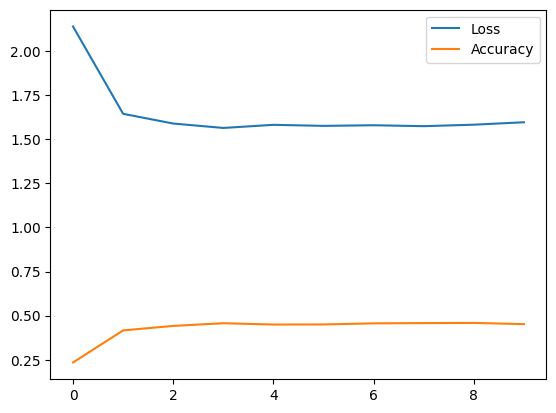

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(["Loss", "Accuracy"])

## Evaluate the model

In [19]:
evaluation = model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.5148 - accuracy: 0.4938


In [20]:
predicted_classes = model.predict(X_test)
predicted_classes = predicted_classes.argmax(1)
# np.set_printoptions(threshold=np.inf, precision=4)
# print(predicted_classes)

313/313 [==============================] - 2s 6ms/step


In [21]:
y_test = y_test.argmax(1)

<Axes: >

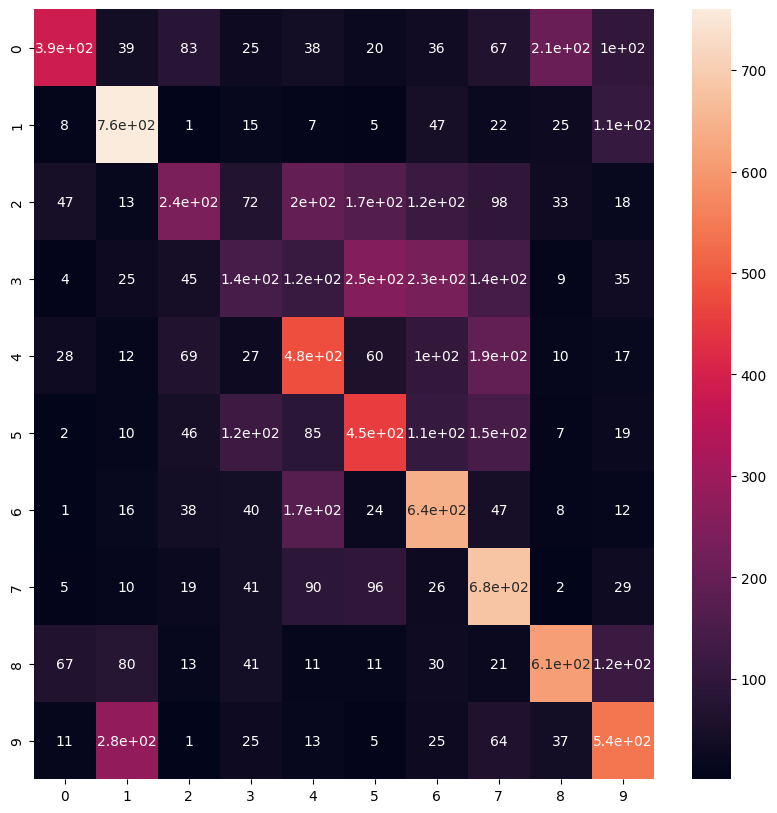

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=predicted_classes, y_true=y_test)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)

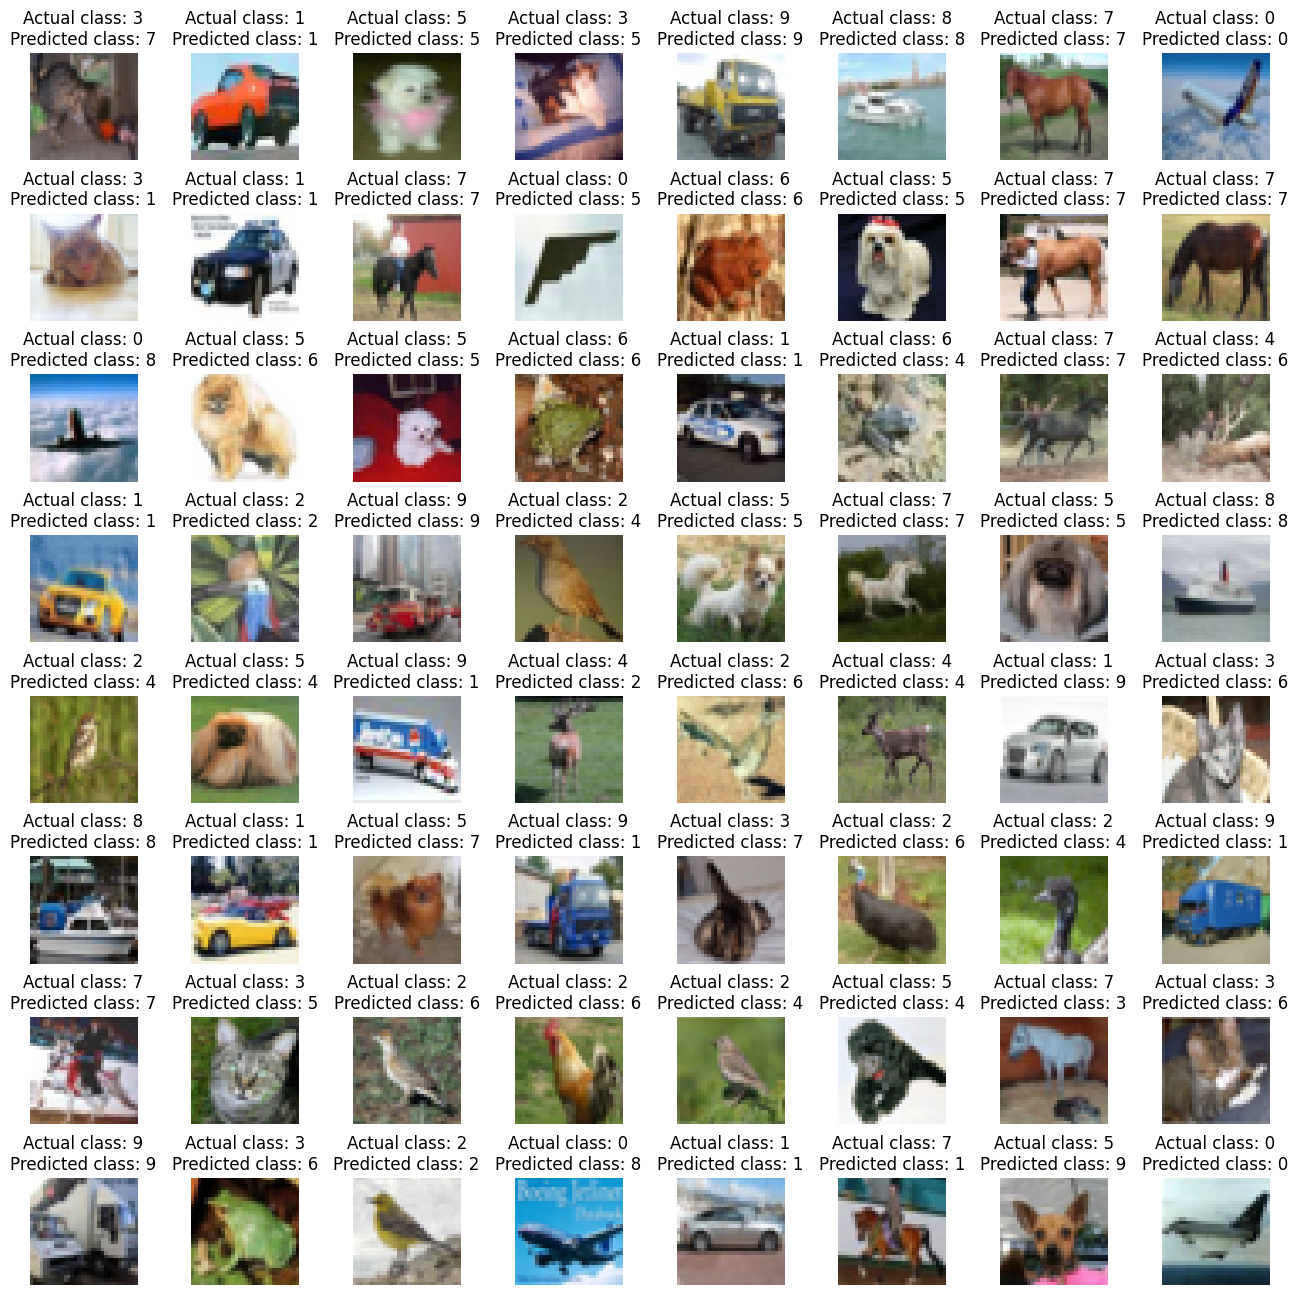

In [23]:
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.ravel()

for i in np.arange(0, 8 * 8):
    index = np.random.randint(len(y_test))
    axes[i].imshow(X_test[index])
    axes[i].axis('off')
    axes[i].set_title('Actual class: {}\nPredicted class: {}'.format(y_test[index], predicted_classes[index]))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
    

## Save the model

In [24]:
import os
dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'trained_model.h5')
model.save(model_path)

/home/min/anaconda3/envs/data_science/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
